In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
dataset = pandas.read_csv("C:\\Users\\ol\\Downloads\\A_Z Handwritten Data\\A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0': 'label'}, inplace=True)

In [6]:
x = dataset.drop('label', axis=1)
y = dataset['label']

In [7]:
print("shape: ", x.shape)
print("columns count:", len(x.iloc[1]))
print("784 = 28X28")

shape:  (372450, 784)
columns count: 784
784 = 28X28


In [8]:
from sklearn.utils import shuffle

x_shuffle = shuffle(x)

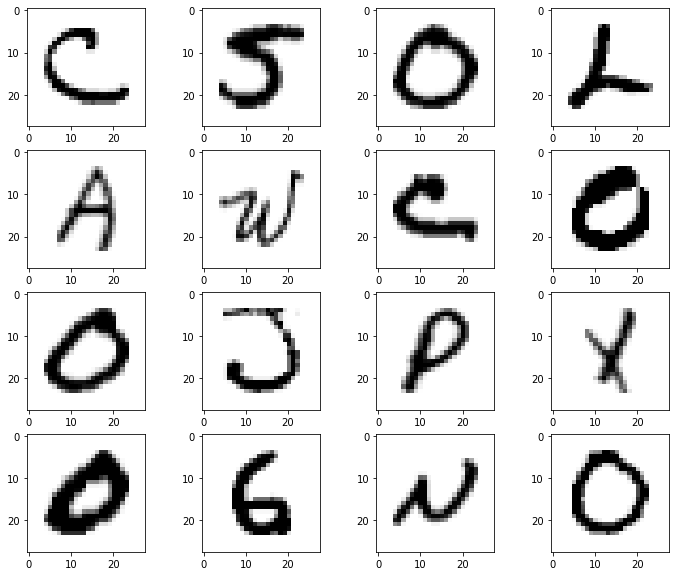

In [9]:
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(x_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [10]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

Amount of each labels


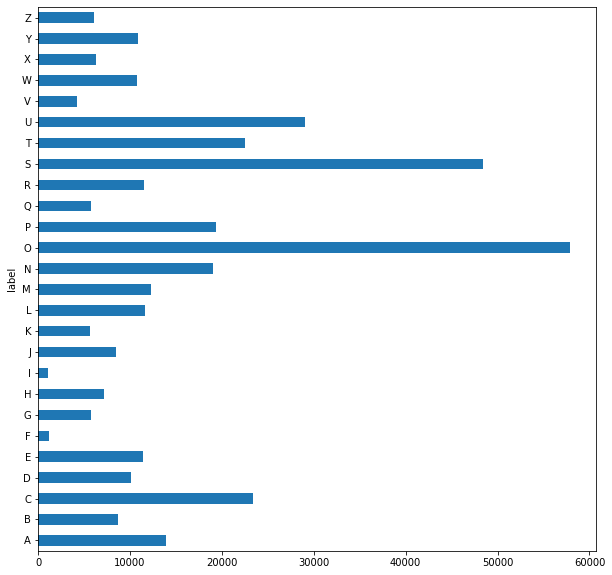

In [11]:
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [12]:
print("I count:", label_size['I'])
print("F count:", label_size['F'])

I count: 1120
F count: 1163


In [13]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(x,y)

# scale data
standard_scaler = MinMaxScaler()
#  вычисляем минимум и максимум по обучающим данным
standard_scaler.fit(X_train)
# масштабируем обучающие данные
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)
print(X_train.shape)

(279337, 784)


Data after scaler


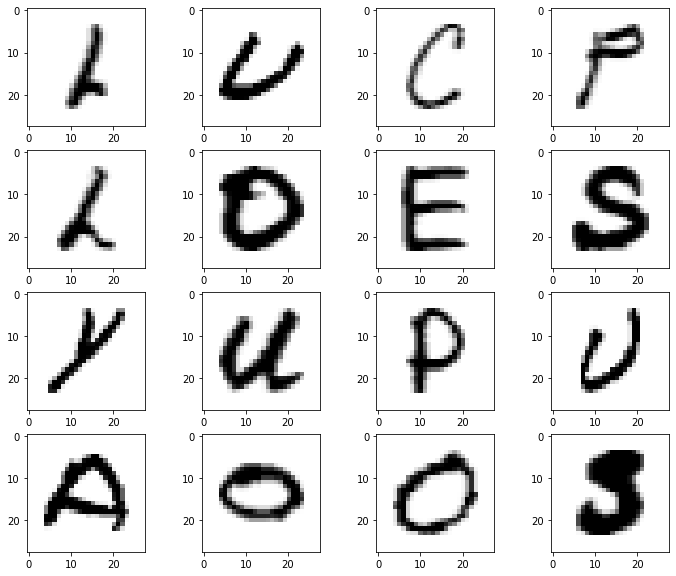

In [14]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [15]:
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# Converts a class vector (integers) to binary class matrix.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [18]:
from keras.models import Sequential

In [16]:
cls = Sequential()
cls.add(Conv2D(32, (1,1), input_shape = (28, 28, 1), activation = 'relu')) #(3,3)
cls.add(MaxPooling2D(pool_size = (2,2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation = 'relu'))
cls.add(Dense(len(y.unique()), activation = 'softmax'))

cls.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = cls.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 200, verbose = 2)
scores = cls.evaluate(x_test, y_test, verbose = 0)
print("CNN Score:",scores[1])

W0719 12:23:57.280593  1088 deprecation_wrapper.py:119] From C:\Py\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 12:23:57.700694  1088 deprecation_wrapper.py:119] From C:\Py\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 12:23:57.807047  1088 deprecation_wrapper.py:119] From C:\Py\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 12:23:58.041115  1088 deprecation_wrapper.py:119] From C:\Py\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0719 12:23:58.047643  1088 deprecation_wrapper.py:119] From C:\Py\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_

Train on 279337 samples, validate on 93113 samples
Epoch 1/10
 - 157s - loss: 0.2416 - acc: 0.9323 - val_loss: 0.0961 - val_acc: 0.9739
Epoch 2/10
 - 124s - loss: 0.0912 - acc: 0.9743 - val_loss: 0.0708 - val_acc: 0.9804
Epoch 3/10
 - 124s - loss: 0.0679 - acc: 0.9804 - val_loss: 0.0564 - val_acc: 0.9844
Epoch 4/10
 - 124s - loss: 0.0558 - acc: 0.9836 - val_loss: 0.0513 - val_acc: 0.9858
Epoch 5/10
 - 123s - loss: 0.0460 - acc: 0.9861 - val_loss: 0.0505 - val_acc: 0.9862
Epoch 6/10
 - 133s - loss: 0.0391 - acc: 0.9880 - val_loss: 0.0408 - val_acc: 0.9889
Epoch 7/10
 - 125s - loss: 0.0340 - acc: 0.9895 - val_loss: 0.0392 - val_acc: 0.9899
Epoch 8/10
 - 125s - loss: 0.0294 - acc: 0.9909 - val_loss: 0.0417 - val_acc: 0.9888
Epoch 9/10
 - 125s - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0386 - val_acc: 0.9899
Epoch 10/10
 - 125s - loss: 0.0230 - acc: 0.9926 - val_loss: 0.0364 - val_acc: 0.9909
CNN Score: 0.9908713069066618


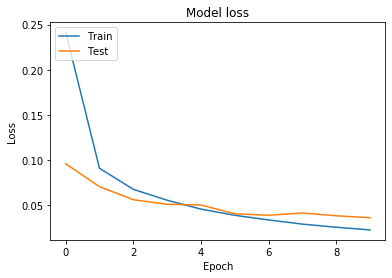

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
cls.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________


In [33]:
scores = cls.evaluate(x_test,y_test, verbose=0)
print("CNN Score:",scores[1])
print(x_test.shape, y_test.shape)

CNN Score: 0.9908713069066618
(93113, 28, 28, 1) (93113, 26)


In [32]:
# save model and architecture to single file
cls.save("model.h5")
print("Saved model to disk")

Saved model to disk
